In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator


from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


In [25]:
train = pd.read_csv("../input/fashion-mnist_train.csv")
test = pd.read_csv("../input/fashion-mnist_test.csv")
print("Shapes of the datasets ", train.shape, test.shape)
print(train.iloc[:,0].head()) # labels

Shapes of the datasets  (60000, 785) (10000, 785)
0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64


In [26]:
X_train = train.drop(['label'], axis=1)
X_test = test.drop(['label'], axis=1)
y_train = train.iloc[:,0]
y_test = test.iloc[:,0]

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalization
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, 10) # Binary class matrix
y_test = keras.utils.to_categorical(y_test, 10)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [27]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.5092 - acc: 0.8228 - val_loss: 0.3077 - val_acc: 0.8916
Epoch 2/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.3287 - acc: 0.8852 - val_loss: 0.2772 - val_acc: 0.9003
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.2820 - acc: 0.9015 - val_loss: 0.2363 - val_acc: 0.9133
Epoch 4/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.2536 - acc: 0.9102 - val_loss: 0.2229 - val_acc: 0.9201
Epoch 5/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.2366 - acc: 0.9172 - val_loss: 0.2310 - val_acc: 0.9155


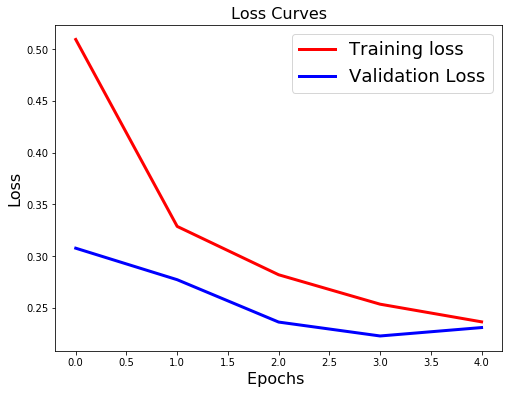

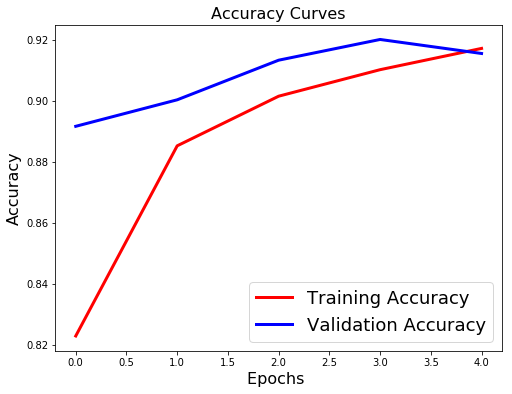

10000/10000 [==============================] - 1s 100us/step


[0.2310422446846962, 0.9155]

In [28]:
batch_size = 128
epochs = 5
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(X_test, y_test))
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model1.evaluate(X_test, y_test)